# Importação das libs

In [1]:
import pandas as pd
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Leitura da fonte de dados

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv')

In [3]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
df.shape

(10008, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


# Área média de todos os imóveis (M²)

In [6]:
df['Metragem'].mean()

442.30065947242207

# Área média dos imóveis da Vila Mariana

In [7]:
df[df['Bairro'] == 'Vila Mariana']['Metragem'].mean()

233.6195652173913

# Contagem dos Imóveis por Bairro

In [8]:
n_imoveis_bairro = df['Bairro'].value_counts()

# Os dez bairros com mais imóveis

<AxesSubplot:>

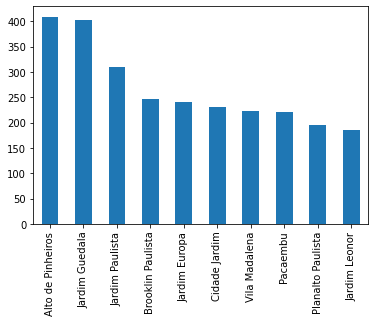

In [9]:
n_imoveis_bairro.head(10).plot.bar()

# Tratamento do campo 'Valor'

In [10]:
# Exclusão de caracteres ('R$' e '.') para conversao
df['Valor'] = df['Valor'].apply(lambda x: x.replace('R$', '').replace('.', ''))

In [11]:
# Exclusão de valores provavelmente referentes a ofertas de aluguel e não de venda ("/Mês")
df = df[~df['Valor'].str.contains('/Mês')]

# Exclusão de valores provavelmente referentes a ofertas de aluguel e não de venda ("/Ano")
df = df[~df['Valor'].str.contains('/Ano')]

# Exclusão de valores provavelmente referentes a ofertas de aluguel e não de venda ("/Dia")
df = df[~df['Valor'].str.contains('/Dia')]

In [12]:
# Conversão do 'Valor' para contínuo
df['Valor']  = df['Valor'].astype(float)

# Verificação dos tipos de dados

In [13]:
df.dtypes

Rua           object
Bairro        object
Cidade        object
Metragem       int64
Quartos        int64
Banheiros      int64
Vagas          int64
Valor        float64
dtype: object

# Desafios
## 1 - Realizar a média da metragem para cada um dos bairros (Paulo)

In [14]:
df[['Bairro', 'Metragem']].groupby('Bairro').mean().reset_index().sort_values(by='Metragem', ascending=False)

,Bairro,Metragem
424,Sítio Represa,37000.00
485,Vila Castelo,2850.00
168,Jardim Guedala,2754.14
307,Jardim das Camélias,1700.00
40,Chácara Flora,1251.44
...,...,...
53,Cidade Antônio Estevão de Carvalho,57.50
213,Jardim Nova Germania,57.00
114,Jardim Benfica,48.00
557,Vila Leonor,46.00


## 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [15]:
# Forma 1:
df[df['Bairro'] == 'Tatuapé']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
164,"Estrada Velha da Penha, 120",Tatuapé,São Paulo,110,2,1,2,450000.00
323,Rua Professora Sebastiana Silva Minhoto,Tatuapé,São Paulo,147,2,3,3,690000.00
2076,Praça Louveira,Tatuapé,São Paulo,250,4,2,3,1350000.00
2179,Praça Louveira,Tatuapé,São Paulo,255,4,2,3,1350000.00
2429,"Rua Ulisses Cruz, 106",Tatuapé,São Paulo,117,2,1,1,495000.00
3072,Rua Professor Carlos Zagotis,Tatuapé,São Paulo,200,3,3,2,950000.00
3867,"Rua Aiarani, 24",Tatuapé,São Paulo,80,2,2,1,380000.00
4029,NaN,Tatuapé,São Paulo,220,4,3,2,885000.00
4285,Rua Gonçalves CreSão Pauloo,Tatuapé,São Paulo,220,3,1,4,1250000.00
5049,"Rua Perucaba, 153",Tatuapé,São Paulo,290,2,3,5,1700000.00


In [16]:
# Forma 2:
df.query("Bairro == 'Tatuapé'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
164,"Estrada Velha da Penha, 120",Tatuapé,São Paulo,110,2,1,2,450000.00
323,Rua Professora Sebastiana Silva Minhoto,Tatuapé,São Paulo,147,2,3,3,690000.00
2076,Praça Louveira,Tatuapé,São Paulo,250,4,2,3,1350000.00
2179,Praça Louveira,Tatuapé,São Paulo,255,4,2,3,1350000.00
2429,"Rua Ulisses Cruz, 106",Tatuapé,São Paulo,117,2,1,1,495000.00
3072,Rua Professor Carlos Zagotis,Tatuapé,São Paulo,200,3,3,2,950000.00
3867,"Rua Aiarani, 24",Tatuapé,São Paulo,80,2,2,1,380000.00
4029,NaN,Tatuapé,São Paulo,220,4,3,2,885000.00
4285,Rua Gonçalves CreSão Pauloo,Tatuapé,São Paulo,220,3,1,4,1250000.00
5049,"Rua Perucaba, 153",Tatuapé,São Paulo,290,2,3,5,1700000.00



## 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão. (Thiago)


### Contagem de imóveis por número de quartos
A maioria dos imóveis possui 3 e 4 quartos

<AxesSubplot:>

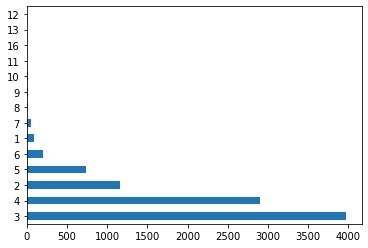

In [17]:
df['Quartos'].value_counts().plot.barh()

### Distribuição dos Valores
A maioria dos imóveis está abaixo de 10 Mi

<AxesSubplot:ylabel='Frequency'>

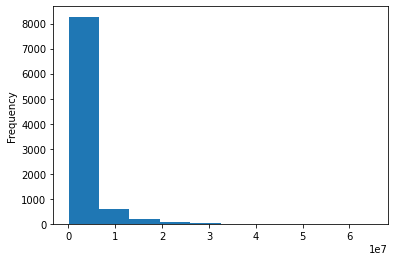

In [18]:
df['Valor'].plot.hist()

### Contagem de imóveis por Quantidade de Vagas
Há mais imóveis com duas ou mais vagas do que com apenas uma

<AxesSubplot:>

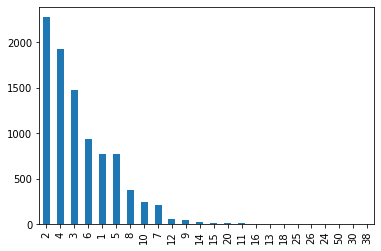

In [19]:
df['Vagas'].value_counts().plot.bar()

### Histogramas sobrepostos (Qtd de Banheiros e Quartos)
Cerca de 3 mil imóveis possuem pelo menos 5 banheiros

<AxesSubplot:ylabel='Frequency'>

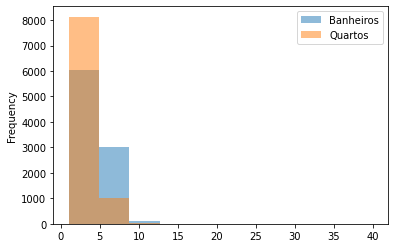

In [20]:
df[['Banheiros', 'Quartos']].plot.hist(alpha=0.5)

## 4 - Pegar outras estatísticas dos dados: média, mediana, min, max. (Vivi)


In [21]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


## 5 - Descobrir quais são os bairros que não têm nome de rua. (Vivi)
Os 10 Bairros com mais imóveis que não possuem dado de Rua

In [22]:
df[df['Rua'].isna()]['Bairro'].value_counts().head(10)

Jardim Guedala       156
Alto de Pinheiros    151
Jardim Paulista      126
Jardim Europa        107
Jardim Leonor        107
Cidade Jardim         96
Morumbi               77
Vila Madalena         69
Brooklin Paulista     66
Jardim América        64
Name: Bairro, dtype: int64